# **Linking to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#**Importing Libraries and Reading The PCA Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, confusion_matrix, silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
hd=pd.read_csv('/content/pca_heart.csv')

dummy_df=pd.read_csv('/content/clean_heart.csv')
target=dummy_df['target']

In [ ]:
hd.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.012756,0.398917,-0.334051,0.101826,-0.525314,0.286440,0.169919,0.134770
1,1.084516,-0.011767,0.823636,-0.094482,0.022870,-0.038243,0.127943,-0.630965
2,1.026259,-0.139006,-0.044097,-0.509337,0.121475,0.113303,0.350597,-0.195307
3,-0.072698,0.385418,-0.348495,0.182108,-0.450502,0.269782,0.141310,0.014171
4,-0.188270,-0.592770,0.927464,0.032338,-0.725426,-0.042154,0.385333,0.293181


# **K-Means Clustering**

**Elbow Method to Determine K**

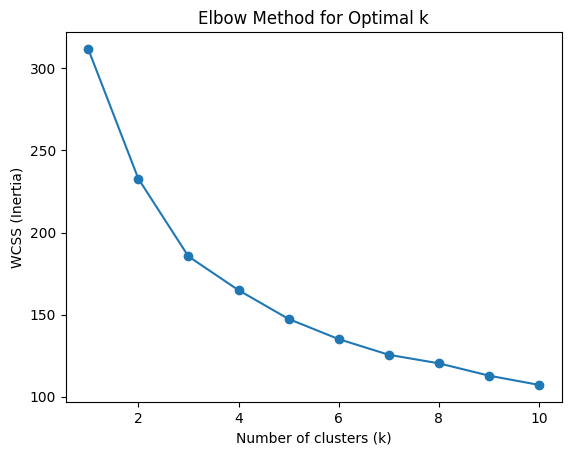

In [ ]:
wcss = [] # Within-Cluster Sum of Squares
K = range(1, 11)  # test k from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(hd)
    wcss.append(kmeans.inertia_)

# Plot elbow
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(hd)

labels = kmeans.labels_

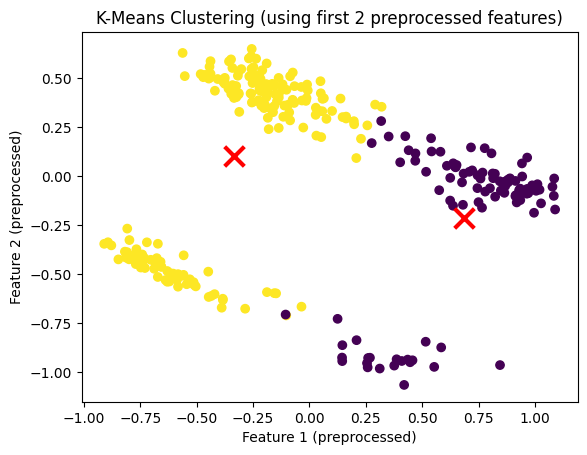

In [ ]:
plt.scatter(hd['PC1'], hd['PC2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, linewidths=3, color='r')
plt.title("K-Means Clustering (using first 2 preprocessed features)")
plt.xlabel("Feature 1 (preprocessed)")
plt.ylabel("Feature 2 (preprocessed)")
plt.show()

In [ ]:
score = silhouette_score(hd, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.2709929683936727


#**Hierarchical Clustering (Dendrogram Analysis)**

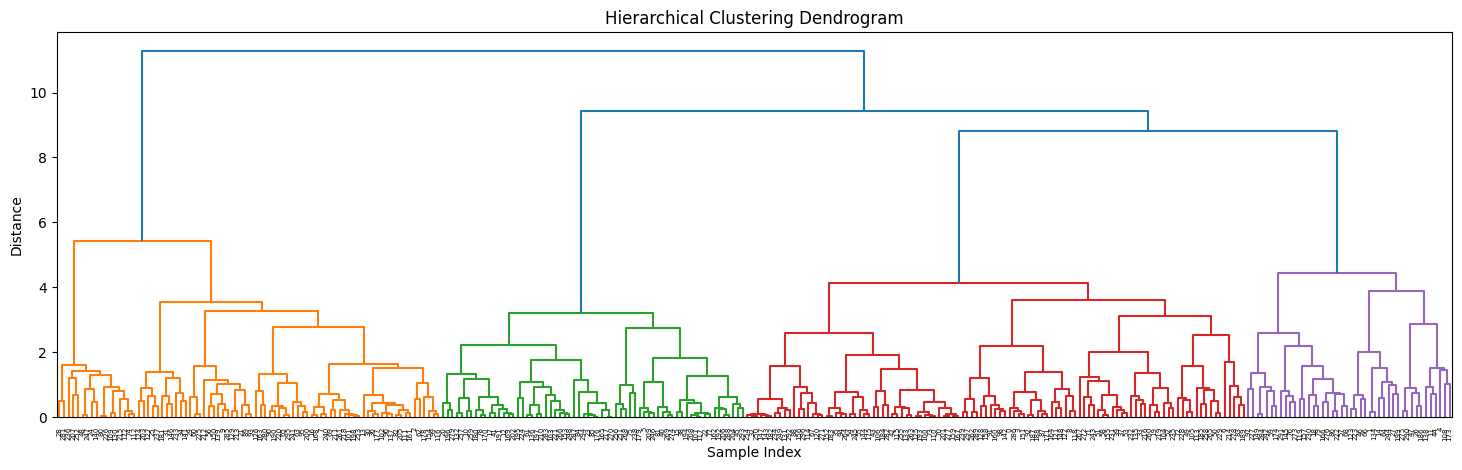

In [ ]:
linked = linkage(hd.toarray() if hasattr(hd, "toarray") else hd, method='ward')

plt.figure(figsize=(18, 5))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

**Fit Agglomerative Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
hc_labels = hc.fit_predict(hd.toarray() if hasattr(hd, "toarray") else hd)

print("Cluster labels (first 10):", hc_labels[:10])

Cluster labels (first 10): [0 0 1 0 0 0 0 1 0 1]


# **Comparing Clusters With Actual Disease Labels**

**K-Means Evaluation**

In [ ]:
ari_kmeans = adjusted_rand_score(target, kmeans.labels_)
print("Adjusted Rand Index (ARI):", ari_kmeans)

Adjusted Rand Index (ARI): 0.18718411743570232


In [ ]:
print("Homogeneity:", homogeneity_score(target, kmeans.labels_))
print("Completeness:", completeness_score(target, kmeans.labels_))
print("V-Measure:", v_measure_score(target, kmeans.labels_))

Homogeneity: 0.14124598781455097
Completeness: 0.1537274062829883
V-Measure: 0.14722262949199746


In [ ]:
cm_kmeans = confusion_matrix(target, kmeans.labels_)
cm_kmeans_df = pd.DataFrame(cm_kmeans,
                     index=[f"True {i}" for i in sorted(set(target))],
                     columns=[f"Cluster {i}" for i in sorted(set(kmeans.labels_))])
print("Confusion Matrix (KMeans):\n", cm_kmeans_df)

Confusion Matrix (KMeans):
         Cluster 0  Cluster 1
True 0         75         61
True 1         23        139


**Hierarchical Evaluation**

In [ ]:
print("Hierarchical Clustering Evaluation")
ari_hc = adjusted_rand_score(target, hc_labels)
print("Adjusted Rand Index (ARI):", ari_hc)

Hierarchical Clustering Evaluation
Adjusted Rand Index (ARI): 0.12283741607982153


In [ ]:
print("Homogeneity:", homogeneity_score(target, hc_labels))
print("Completeness:", completeness_score(target, hc_labels))
print("V-Measure:", v_measure_score(target, hc_labels))

Homogeneity: 0.09393388323229585
Completeness: 0.11006047093316669
V-Measure: 0.1013597407381378


In [ ]:
cm_hc = confusion_matrix(target, hc_labels)
cm_hc_df = pd.DataFrame(cm_hc,
                     index=[f"True {i}" for i in sorted(set(target))],
                     columns=[f"Cluster {i}" for i in sorted(set(hc_labels))])
print("Confusion Matrix (Hierarchical):\n", cm_hc_df)

Confusion Matrix (Hierarchical):
         Cluster 0  Cluster 1
True 0         75         61
True 1        141         21
